# Employee Retention Analysis
----
Employee turnover is a challenge many companies face. Employee's leave for multiple reasons and in analyzing employee turnover through multiple variables to find outwhat makes people leave a job.

First I start with importing the necessary programs and establish a file path to the proper data set.

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as matplot
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

file_path = ('human-resources-analytics/HR_comma_sep.csv')

In [265]:
##pd.read_csv(file_path)
df = pd.read_csv(file_path)

I went ahead to rename some columns into more readable names.

In [266]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'number_project': 'project_count',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'years_at_company',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Overview

First I wanted to see what what variables I would be working with.

In [267]:
df.shape

(14999, 10)

In [268]:
df.dtypes

satisfaction             float64
last_evaluation          float64
project_count              int64
average_monthly_hours      int64
years_at_company           int64
Work_accident              int64
turnover                   int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [269]:
df.describe()

,satisfaction,last_evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,turnover,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Since I was investigating turnover rate I decided to see the how many people that worked for the company left.
I divided the number of employees that left by the total number of employees in the dateset.

In [270]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

The turnover rate is rather high at approximately 24%, almost the quarter of the workforce. Next I wanted to see if the high turnover came from a specific department within the company so I used df.groupby to find the total number of employee turnover grouped by departmen and divided that by the total number of employees, grouped by deparment to get the turnover rate in each department.

Next I wanted to find out how all the variables correlated with each other and see specifically if turnover has any correlation with any of the other variables.

In [271]:
df.corr()

,satisfaction,last_evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,turnover,promotion_last_5years
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
project_count,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
years_at_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


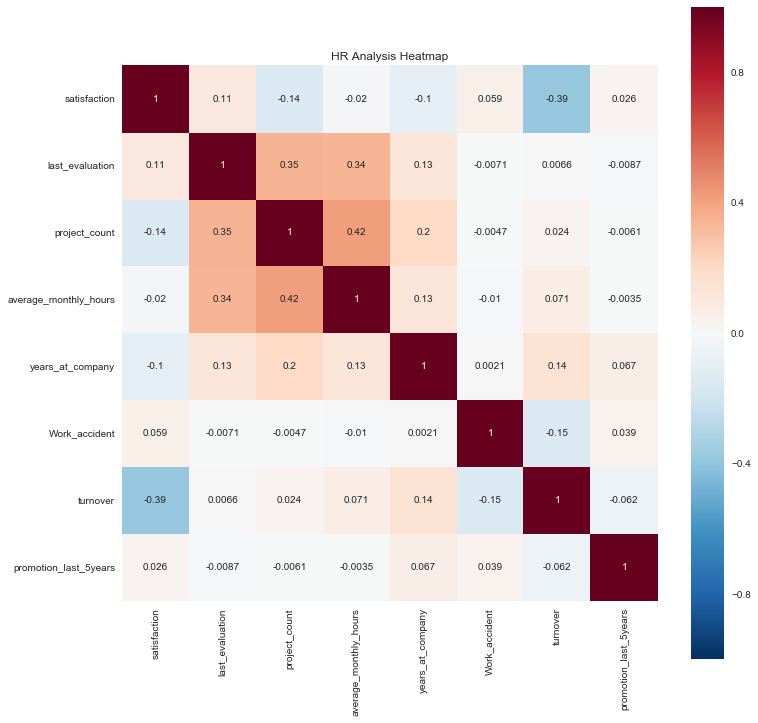

In [272]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(), square=True, annot=True, robust = True).set_title('HR Analysis Heatmap')

The headmap doesn't show any variables with very high correlation.
There is a notable negative correlation between turnover and satisfaction to explore.
The highest notable correlation is between project count and average monthly hours
Since there was no high correlation I will analyze how turnover looks through notable variables.

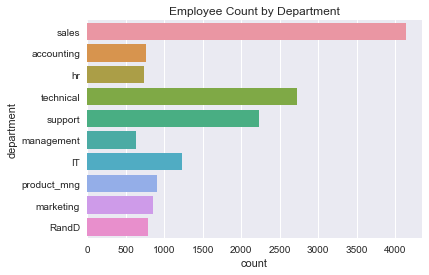

In [273]:
ax = sns.countplot(y='department', data=df).set_title('Employee Count by Department')

In [274]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

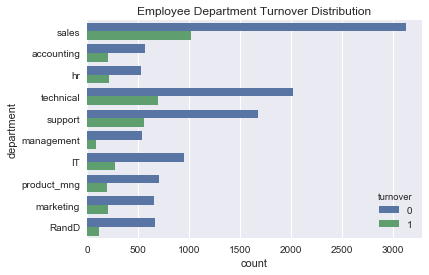

In [275]:
ax = sns.countplot(y='department', hue='turnover', data=df).set_title('Employee Department Turnover Distribution')

Based on the graph the highest turnover is in the Sales, Technical, and Support departments but  the high turnover in these cases may be due to these departments having the largest number of employees.

In [276]:
df['department'].value_counts()
df.groupby(['department']).sum()['turnover']

df.groupby(['department']).sum()['turnover']/df['department'].value_counts()

IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
dtype: float64

Calcualting turnover in each department as a percentage provides a better understanding of turnover.
1. The majority of departments are losing 20% or more of there employees.
2. Human resources suffers the most.
3. Management department and R&D suffered the least amount of turnover.

# Turnover Based on Salary.

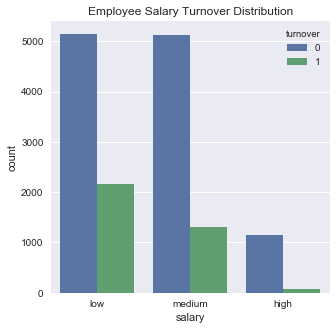

In [277]:
plt.subplots(figsize=(5, 5)) 
ax = sns.countplot(x='salary', hue='turnover', data=df,).set_title('Employee Salary Turnover Distribution')

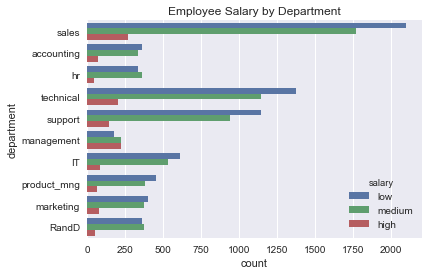

In [278]:
ax = sns.countplot(y='department', hue='salary', data=df).set_title('Employee Salary by Department')

Conclusions that I drew from organizing the data based on salary is that:
1. The majority of people who left had either medium or low salary.
2. Across departments low and medium wage workers disproportionately outnumber high wage employees.
    Will require data with a more thorough breakdown of employee positions to eliminate bias.
3. Management has the only department where more workers recieved high salaries than low salaries.

# Turnover Based on Satisfaction

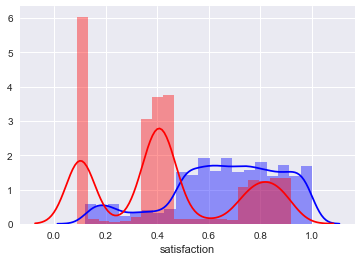

In [279]:
x = df.loc[(df['turnover'] == 0), 'satisfaction']
ax = sns.distplot(x, bins=20, hist=True, kde=True, color='b', label='stay')

y = df.loc[(df['turnover'] == 1), 'satisfaction']
ax = sns.distplot(y, bins=20, hist=True, kde=True, color='r', label='leave')

Employees with mid to high levels of satisfaction tend to stay with the company.
Naturally employees who were extremely unsatisfied at their comapany left but interestingly employee statisfaction levels at distinct points of high, mid, and low also left the company.

# Turnover Based on Evaluation

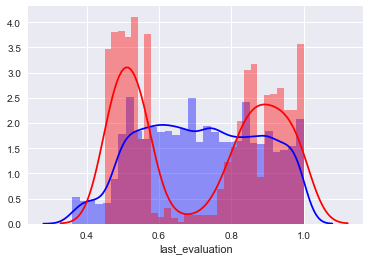

In [280]:
x = df.loc[(df['turnover'] == 0),'last_evaluation']
ax = sns.distplot(x, bins=30, hist=True, kde=True, color='b', label='stay')

y = df.loc[(df['turnover'] == 1),'last_evaluation']
ax = sns.distplot(y, bins=30, hist=True, kde=True, color='r', label='leave')

Employees with either extremely high or extremely low evaluations tend to leave the company.

# Turnover Based on Project Count

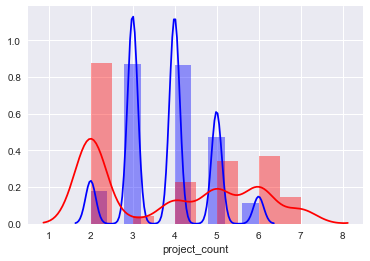

In [281]:
x = df.loc[(df['turnover'] == 0), 'project_count']
ax = sns.distplot(x, bins=10, hist=True, kde=True, color='b', label='stay')

y = df.loc[(df['turnover'] == 1), 'project_count']
ax = sns.distplot(y, bins=10, hist=True, kde=True, color='r', label='leave')

Employees that stay with the company handled around 3-5 projects. Employees with more or less projects tend to leave.

# Turnover Based on Average Monthly Hours

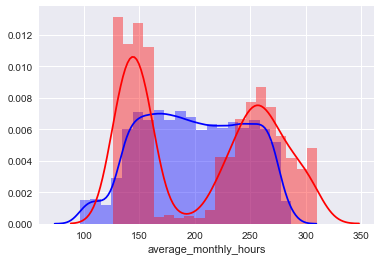

In [282]:
x = df.loc[(df['turnover'] == 0), 'average_monthly_hours']
ax = sns.distplot(x, bins=20, hist=True, kde=True, color='b', label='stay')

x = df.loc[(df['turnover'] == 1), 'average_monthly_hours']
ax = sns.distplot(x, bins=20, hist=True, kde=True, color='r', label='leave')

Employees who work too many or to little tend to leave.

# Turnover Based on Years at Company

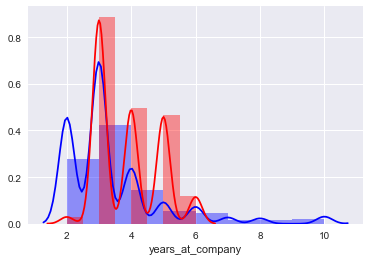

In [283]:
x = df.loc[(df['turnover'] == 0), 'years_at_company']
ax = sns.distplot(x, bins=8, hist=True, kde=True, color='b', label='stay')

x = df.loc[(df['turnover'] == 1), 'years_at_company']
ax = sns.distplot(x, bins=8, hist=True, kde=True, color='r', label='leave')

Most employees leave withing working 3 to 6 years with the company.

# Machine Learning

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [285]:
hr_features = df[['satisfaction',
   'last_evaluation',
   'project_count',
   'average_monthly_hours',
   'years_at_company',
   'Work_accident',
   'promotion_last_5years',
    'department',
    'salary'
   ]]

df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

hr_target = df[['turnover']]

x = hr_features
y = hr_target

x = df.drop('turnover', axis=1)

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


In [287]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.values.ravel())

predict = lr_model.predict(x_test)
accuracy_score(y_test, predict)


0.7698666666666667

In [288]:
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[2661  201]
 [ 662  226]]


             precision    recall  f1-score   support

          0       0.80      0.93      0.86      2862
          1       0.53      0.25      0.34       888

avg / total       0.74      0.77      0.74      3750



In [289]:
k = KNeighborsClassifier()
k.fit(x_train, y_train.values.ravel())
predict_k = k.predict(x_test)
accuracy_score(y_test, predict_k)

0.95626666666666671

In [290]:
print(confusion_matrix(y_test, predict_k))
print('\n')
print(classification_report(y_test, predict_k))

[[2773   89]
 [  75  813]]


             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2862
          1       0.90      0.92      0.91       888

avg / total       0.96      0.96      0.96      3750



In [291]:
trees = tree.DecisionTreeClassifier()
trees.fit(x_train, y_train)
prediction_tree = trees.predict(x_test)
accuracy_score(y_test, prediction_tree)

0.97733333333333339

In [292]:
print(confusion_matrix(y_test, prediction_tree))
print('\n')
print(classification_report(y_test, prediction_tree))

[[2811   51]
 [  34  854]]


             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2862
          1       0.94      0.96      0.95       888

avg / total       0.98      0.98      0.98      3750



(-1, 9)

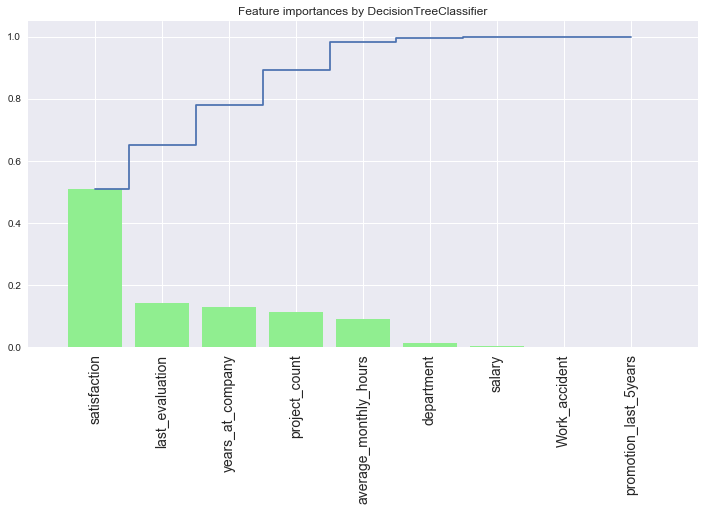

In [293]:
importances = trees.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightgreen',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

In [294]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train.values.ravel())
predict_forest = forest.predict(x_test)
accuracy_score(y_test, predict_forest)

0.98906666666666665

In [295]:
print(confusion_matrix(y_test, predict_forest))
print('\n')
print(classification_report(y_test, predict_forest))

[[2857    5]
 [  36  852]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2862
          1       0.99      0.96      0.98       888

avg / total       0.99      0.99      0.99      3750



(-1, 9)

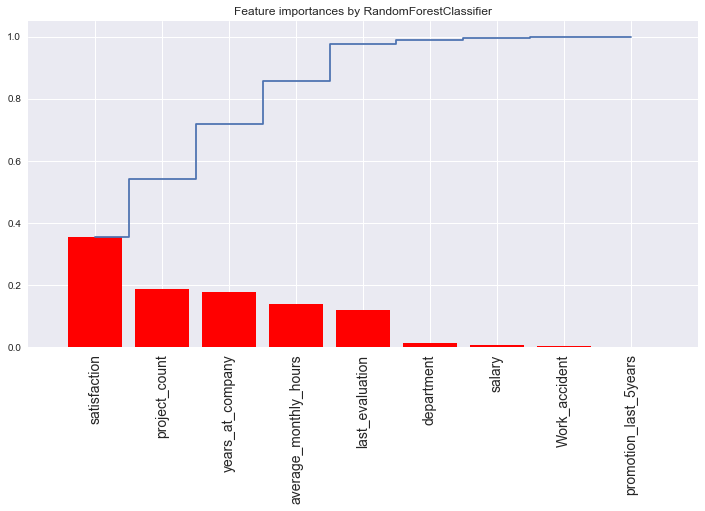

In [296]:
importances = forest.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForestClassifier")
plt.bar(range(len(indices)), importances[indices], color='red',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

# Conclusions

# Room for Improvement